In [ ]:
Question 8 -
Using the data from Question 5, write code the analyze the data and answer the following questions Note -
1. Draw plots to demonstrate the analysis for the following questions and better visualizations
2. Write code comments wherever required for code understanding

Insights to be drawn -
● Get all the overall ratings for each season and using plots compare the ratings for all the
seasons, like season 1 ratings, season 2, and so on.
● Get all the episode names, whose average rating is more than 8 for every season
● Get all the episode names that aired before May 2019
● Get the episode name from each season with the highest and lowest rating
● Get the summary for the most popular ( ratings ) episode in every season

In [ ]:
#it is saved as latest_json in my local computer so will load the data from there only

In [1]:
import pandas as pd
import numpy as np
import json

In [2]:
with open("latest_json",'r') as f: #in this we are loading a file 
    data=json.load(f)

In [11]:
final_data = data['_embedded']['episodes'] # here we are extracting the data which is needed

In [25]:
df = pd.json_normalize(final_data) #we are converting a json data into a dataframe as it is more complex so 
#we have used json.normalize so that it can load properly

In [26]:
df.head()

,id,url,name,season,number,type,airdate,airtime,airstamp,runtime,summary,rating.average,image.medium,image.original,_links.self.href,_links.show.href
0,869671,https://www.tvmaze.com/episodes/869671/westwor...,The Original,1,1,regular,2016-10-02,21:00,2016-10-03T01:00:00+00:00,68,<p>A woman named Dolores is a free spirit in t...,8.0,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,https://api.tvmaze.com/episodes/869671,https://api.tvmaze.com/shows/1371
1,911201,https://www.tvmaze.com/episodes/911201/westwor...,Chestnut,1,2,regular,2016-10-09,21:00,2016-10-10T01:00:00+00:00,60,<p>Bernard suspects that someone is sabotaging...,7.7,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,https://api.tvmaze.com/episodes/911201,https://api.tvmaze.com/shows/1371
2,911204,https://www.tvmaze.com/episodes/911204/westwor...,The Stray,1,3,regular,2016-10-16,21:00,2016-10-17T01:00:00+00:00,60,<p>Bernard continues to investigate Dolores' s...,7.6,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,https://api.tvmaze.com/episodes/911204,https://api.tvmaze.com/shows/1371
3,911205,https://www.tvmaze.com/episodes/911205/westwor...,Dissonance Theory,1,4,regular,2016-10-23,21:00,2016-10-24T01:00:00+00:00,60,<p>While Dolores joins William and Logan on th...,7.9,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,https://api.tvmaze.com/episodes/911205,https://api.tvmaze.com/shows/1371
4,927174,https://www.tvmaze.com/episodes/927174/westwor...,Contrapasso,1,5,regular,2016-10-30,21:00,2016-10-31T01:00:00+00:00,60,<p>Dolores takes the first step on her path of...,8.0,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,https://api.tvmaze.com/episodes/927174,https://api.tvmaze.com/shows/1371


In [27]:
df.columns

Index(['id', 'url', 'name', 'season', 'number', 'type', 'airdate', 'airtime',
       'airstamp', 'runtime', 'summary', 'rating.average', 'image.medium',
       'image.original', '_links.self.href', '_links.show.href'],
      dtype='object')

In [28]:
df.shape

(36, 16)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                36 non-null     int64  
 1   url               36 non-null     object 
 2   name              36 non-null     object 
 3   season            36 non-null     int64  
 4   number            36 non-null     int64  
 5   type              36 non-null     object 
 6   airdate           36 non-null     object 
 7   airtime           36 non-null     object 
 8   airstamp          36 non-null     object 
 9   runtime           36 non-null     int64  
 10  summary           36 non-null     object 
 11  rating.average    36 non-null     float64
 12  image.medium      36 non-null     object 
 13  image.original    36 non-null     object 
 14  _links.self.href  36 non-null     object 
 15  _links.show.href  36 non-null     object 
dtypes: float64(1), int64(4), object(11)
memory usa

In [30]:
df.isnull().sum()

id                  0
url                 0
name                0
season              0
number              0
type                0
airdate             0
airtime             0
airstamp            0
runtime             0
summary             0
rating.average      0
image.medium        0
image.original      0
_links.self.href    0
_links.show.href    0
dtype: int64

In [31]:
df.describe()

,id,season,number,runtime,rating.average
count,3.600000e+01,36.000000,36.000000,36.000000,36.000000
mean,1.570518e+06,2.388889,5.055556,62.888889,7.872222
std,5.198296e+05,1.128280,2.714453,8.386308,0.373869
min,8.696710e+05,1.000000,1.000000,51.000000,7.100000
25%,9.430668e+05,1.000000,3.000000,60.000000,7.675000
50%,1.459790e+06,2.000000,5.000000,60.000000,7.800000
75%,1.807458e+06,3.000000,7.000000,60.000000,8.000000
max,2.326661e+06,4.000000,10.000000,90.000000,8.700000


In [ ]:
● Get all the overall ratings for each season and using plots compare the ratings for all the
seasons, like season 1 ratings, season 2, and so on.

In [50]:
df_per_season =pd.DataFrame( df.groupby(['season' , 'rating.average']).min())

In [55]:
df.groupby('season')['rating.average'].mean()  ##average ratings for each season

season
1    8.0900
2    8.0000
3    7.7750
4    7.5375
Name: rating.average, dtype: float64

In [51]:
df_per_season

id  \
season rating.average            
1      7.6              911204   
       7.7              911201   
       7.9              911205   
       8.0              869671   
       8.5              943066   
       8.6              938404   
       8.7              943067   
2      7.6             1446362   
       7.7             1440915   
       7.8             1214222   
       7.9             1459961   
       8.0             1440917   
       8.4             1459789   
       8.5             1459790   
       8.7             1459788   
3      7.5             1800151   
       7.7             1800152   
       7.8             1800146   
       7.9             1800149   
       8.0             1789333   
4      7.1             2326389   
       7.4             2326655   
       7.5             2326659   
       7.6             2326656   
       7.7             2326657   
       7.8             2326658   

                                                                     url  \
season rating.average                                                      
1      7.6             https://www.tvmaze.com/episodes/911204/westwor...   
       7.7             https://www.tvmaze.com/episodes/911201/westwor...   
       7.9             https://www.tvmaze.com/episodes/911205/westwor...   
       8.0             https://www.tvmaze.com/episodes/869671/westwor...   
       8.5             https://www.tvmaze.com/episodes/943066/westwor...   
       8.6             https://www.tvmaze.com/episodes/938404/westwor...   
       8.7             https://www.tvmaze.com/episodes/943067/westwor...   
2      7.6             https://www.tvmaze.com/episodes/1446362/westwo...   
       7.7             https://www.tvmaze.com/episodes/1440915/westwo...   
       7.8             https://www.tvmaze.com/episodes/1214222/westwo...   
       7.9             https://www.tvmaze.com/episodes/1459961/westwo...   
       8.0             https://www.tvmaze.com/episodes/1440917/westwo...   
       8.4             https://www.tvmaze.com/episodes/1459789/westwo...   
       8.5             https://www.tvmaze.com/episodes/1459790/westwo...   
       8.7             https://www.tvmaze.com/episodes/1459788/westwo...   
3      7.5             https://www.tvmaze.com/episodes/1800151/westwo...   
       7.7             https://www.tvmaze.com/episodes/1800152/westwo...   
       7.8             https://www.tvmaze.com/episodes/1800146/westwo...   
       7.9             https://www.tvmaze.com/episodes/1800149/westwo...   
       8.0             https://www.tvmaze.com/episodes/1789333/westwo...   
4      7.1             https://www.tvmaze.com/episodes/2326389/westwo...   
       7.4             https://www.tvmaze.com/episodes/2326655/westwo...   
       7.5             https://www.tvmaze.com/episodes/2326659/westwo...   
       7.6             https://www.tvmaze.com/episodes/2326656/westwo...   
       7.7             https://www.tvmaze.com/episodes/2326657/westwo...   
       7.8             https://www.tvmaze.com/episodes/2326658/westwo...   

                                            name  number     type     airdate  \
season rating.average                                                           
1      7.6                             The Stray       3  regular  2016-10-16   
       7.7                              Chestnut       2  regular  2016-10-09   
       7.9                     Dissonance Theory       4  regular  2016-10-23   
       8.0                           Contrapasso       1  regular  2016-10-02   
       8.5             The Well-Tempered Clavier       9  regular  2016-11-27   
       8.6                         Trompe L'Oeil       7  regular  2016-11-13   
       8.7                    The Bicameral Mind      10  regular  2016-12-04   
2      7.6                          Akane No Mai       5  regular  2018-05-20   
       7.7                           Phase Space       2  regular  2018-04-29   
       7.8                    Journey Into Night       

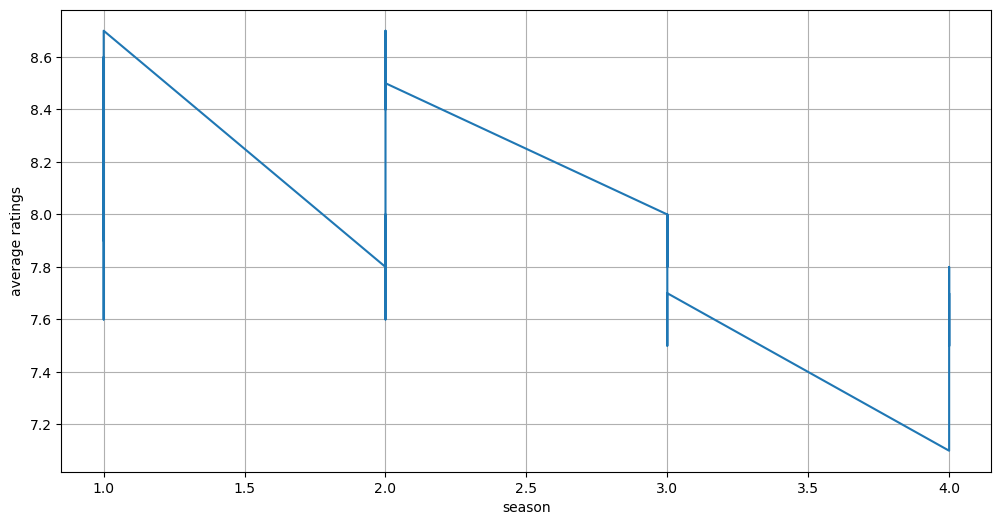

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plot landings per year
plt.figure(figsize=(12, 6))
plt.plot(df['season'],df['rating.average'])
plt.xlabel('season')
plt.ylabel('average ratings')
plt.grid(True)
plt.show()

In [ ]:
# we can clearly see the ratings are getting dropped as more season are coming

In [56]:
df.columns

Index(['id', 'url', 'name', 'season', 'number', 'type', 'airdate', 'airtime',
       'airstamp', 'runtime', 'summary', 'rating.average', 'image.medium',
       'image.original', '_links.self.href', '_links.show.href'],
      dtype='object')

In [ ]:
● Get all the episode names that aired before May 2019

In [70]:
import datetime as dt

new_data = df[df['airdate']< "2019-05-01"]

In [72]:
new_data['name']

0                  The Original
1                      Chestnut
2                     The Stray
3             Dissonance Theory
4                   Contrapasso
5                 The Adversary
6                 Trompe L'Oeil
7                   Trace Decay
8     The Well-Tempered Clavier
9            The Bicameral Mind
10           Journey Into Night
11                      Reunion
12              Virtù e Fortuna
13     The Riddle of the Sphinx
14                 Akane No Mai
15                  Phase Space
16                 Les Écorchés
17                      Kiksuya
18              Vanishing Point
19                The Passenger
Name: name, dtype: object

In [ ]:
● Get all the episode names, whose average rating is more than 8 for every season

In [105]:
rating_above_8 = df.groupby(['season', 'name']).filter(lambda x: x['rating.average'].mean() > 8)
high_rated_episode_names = rating_above_8 ['name'].unique()

In [106]:
high_rated_episode_names

array(["Trompe L'Oeil", 'The Well-Tempered Clavier', 'The Bicameral Mind',
       'Kiksuya', 'Vanishing Point', 'The Passenger'], dtype=object)

In [ ]:
● Get the episode name from each season with the highest and lowest rating

In [107]:
season_max_rating = df.groupby('season')['rating.average'].idxmax()
season_min_rating = df.groupby('season')['rating.average'].idxmin()
highest_rated_episodes = df.loc[season_max_rating, ['season', 'name']]
lowest_rated_episodes = df.loc[season_min_rating, ['season', 'name']]


In [ ]:
● Get the summary for the most popular ( ratings ) episode in every season

In [109]:
season_max_rating = df.groupby('season')['rating.average'].idxmax()
highest_rated_episodes_summary = df.loc[season_max_rating, ['summary']]

In [110]:
highest_rated_episodes_summary

,summary
9,<p>Delores finds out the truth about William's...
17,<p>Another of Westworld's Host revolutionaries...
20,"<p>If you're stuck in a loop, try walking in a..."
32,<p>God is bored.</p>
